# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The task is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). 

Example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv') is just an example of the final test set that will be used to evaluate the solutions. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') will not be used as an independent test set when developing the models, but only to prepare the 'prediction/inference' script to make predictions on completely unseen data.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV



root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


# **Part 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) that will be needed to train models to predict. 

In [2]:
# Read in the training data and targets files into dataframes
tddf = pd.read_csv(training_data_path)
ttdf = pd.read_csv(training_targets_path)

# Print the first few rows of the training targets dataframe
print(ttdf.head())

# Print the shape of the training targets dataframe
print(ttdf.shape)

# Print the column names of the training data dataframe
print(tddf.columns)

# Print the first few rows of the training data dataframe
print(tddf.head())

# Print the shape of the training data dataframe
print(tddf.shape)

   TARGET_deathRate
0             199.5
1             137.1
2             126.9
3             173.8
4             179.8
(2438, 1)
Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')
   avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0         59.0                30          404.3      33975        8251   
1        114.0                41          403.8      47363       22702   
2    

Histograms of all features to visualise their distributions and identify outliers:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84d34a7190>,
      dtype=object)

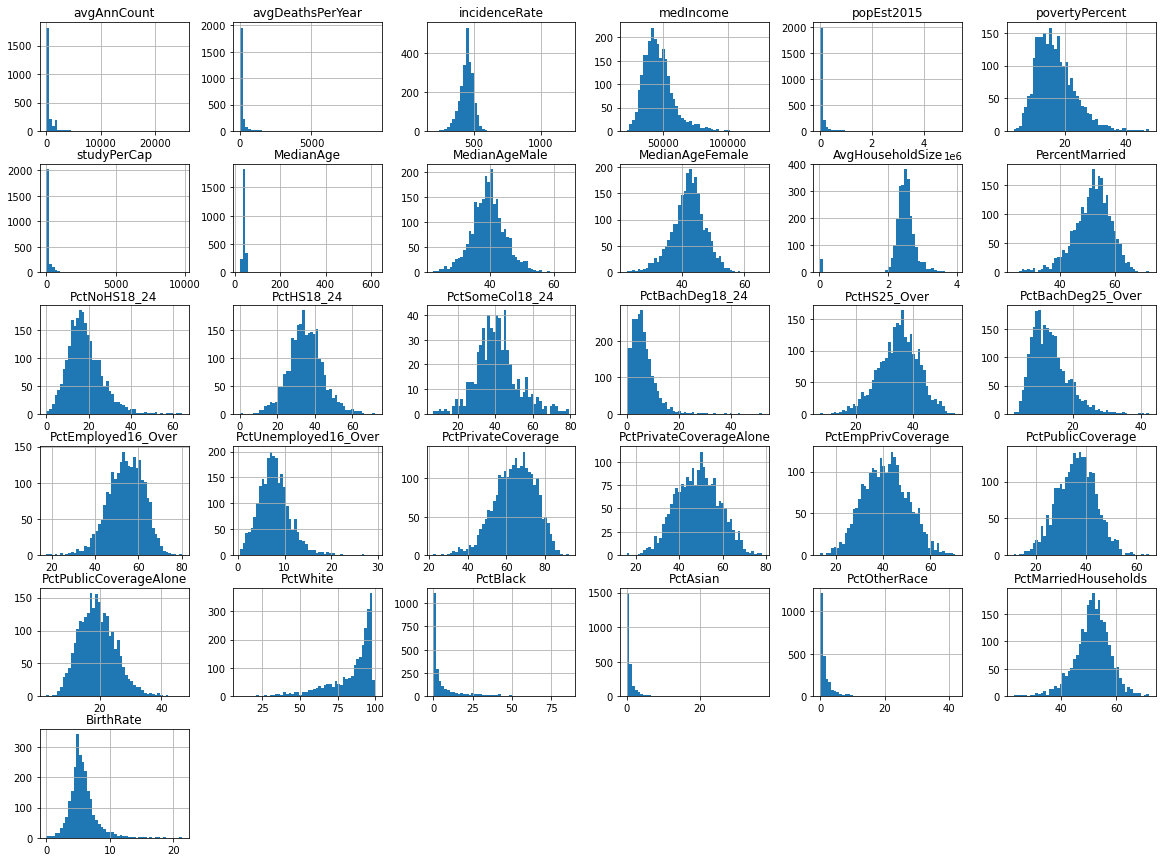

In [3]:
tddf.hist(bins = 50, figsize=(20,15))

Study per cap is not listed on the Data Dictionary, furthermore most of it's values are at 0 and has a very low realtive correlation to the other features. In this specific situation removing the column is in the best interest of accuracy.

In [155]:
#tddf = tddf.drop('studyPerCap', axis=1)

Other immediately irrelevant features include:     
MedianAgeMale: Median age of male county residents (compared to overall median age)
MedianAgeFemale: Median age of female county residents (compared to overall median age)
PercentMarried: Percent of county residents who are married (compared to percent of married households)
BirthRate: Number of live births relative to number of women in county (may have weaker association with cancer mortality rates than other demographic and health-related factors)

In [156]:
#tddf.drop(['MedianAgeMale', 'MedianAgeFemale', 'PercentMarried', 'BirthRate'], axis=1, inplace=True)

In [157]:
#tddf['PctCoverage'] = tddf['PctPrivateCoverage'] + tddf['PctPublicCoverage']

48

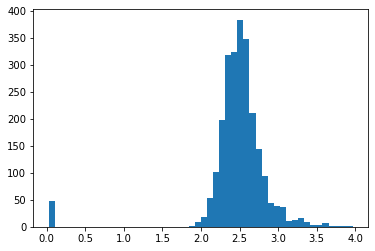

In [4]:
plt.hist(tddf['AvgHouseholdSize'], bins = 50)
lessthan1 = tddf['AvgHouseholdSize'] < 1
tddf[lessthan1]['AvgHouseholdSize']
len(tddf[lessthan1]['AvgHouseholdSize'])

We have 48 values with an average household size under 1. This doesn't make sense from context and can be considered unusual values. 

(array([2.407e+03, 2.200e+01, 7.000e+00, 1.000e+00, 1.000e+00]),
 array([6.00000e+00, 4.99780e+03, 9.98960e+03, 1.49814e+04, 1.99732e+04,
        2.49650e+04]),
 <a list of 5 Patch objects>)

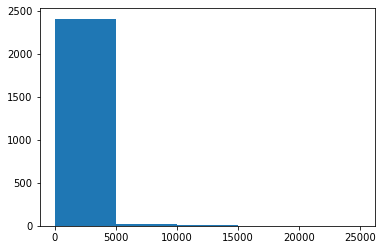

In [5]:
plt.hist(tddf['avgAnnCount'], bins = 5)

(array([2.409e+03, 2.100e+01, 6.000e+00, 1.000e+00, 1.000e+00]),
 array([3.0000e+00, 1.8914e+03, 3.7798e+03, 5.6682e+03, 7.5566e+03,
        9.4450e+03]),
 <a list of 5 Patch objects>)

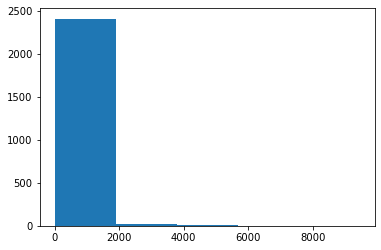

In [6]:
plt.hist(tddf['avgDeathsPerYear'], bins = 5)

0         8251
1        22702
2         9899
3        48904
4        22255
         ...  
2433     61109
2434     17299
2435    118212
2436      2640
2437    119980
Name: popEst2015, Length: 2438, dtype: int64

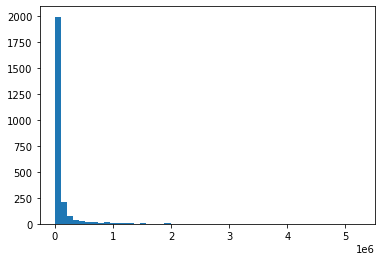

In [7]:
plt.hist(tddf['popEst2015'], bins = 50)
tddf['popEst2015']

(array([2402.,   27.,    6.,    0.,    3.]),
 array([   0.       , 1952.4617996, 3904.9235992, 5857.3853988,
        7809.8471984, 9762.308998 ]),
 <a list of 5 Patch objects>)

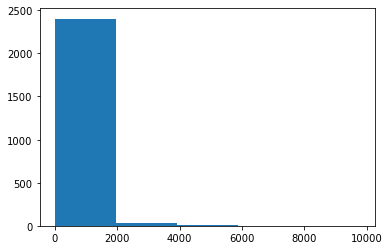

In [8]:
plt.hist(tddf['studyPerCap'], bins = 5)

26

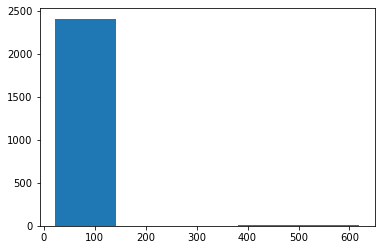

In [9]:
plt.hist(tddf['MedianAge'], bins = 5)
EternalYouth = tddf['MedianAge'] > 115
len(tddf[EternalYouth]['MedianAge'])

Here we can see 26 different values with a median age higher than the longest recorded living person. These values can hence be determined from context as unusual.

(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,  27., 155., 515., 706., 557., 237.,  83.,  48.,  29.,  12.,
         11.,   4.,   4.]),
 array([0.0221  , 0.180016, 0.337932, 0.495848, 0.653764, 0.81168 ,
        0.969596, 1.127512, 1.285428, 1.443344, 1.60126 , 1.759176,
        1.917092, 2.075008, 2.232924, 2.39084 , 2.548756, 2.706672,
        2.864588, 3.022504, 3.18042 , 3.338336, 3.496252, 3.654168,
        3.812084, 3.97    ]),
 <a list of 25 Patch objects>)

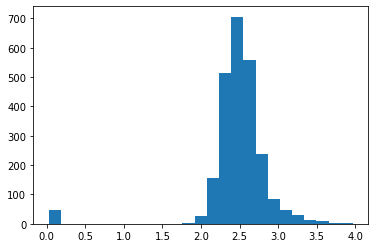

In [10]:
plt.hist(tddf['AvgHouseholdSize'], bins = 25)

In [11]:
tddf.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24',
       'PctBachDeg18_24', 'PctHS25_Over', 'PctBachDeg25_Over',
       'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

In [12]:
corr = {}
corr_abs = {}
# Loop through the columns of the training data dataframe
for num_feat in range(len(tddf.columns)):
    feat = tddf.columns[num_feat]# Get the name of the feature/column
    feature = tddf[feat]# Get the values of the feature
    target = ttdf.squeeze() # Get the target values
    correlation = feature.corr(target)# Calculate the correlation between feature and target
    corr[feat] = correlation# Store the correlation value in the dictionary
    corr_abs[feat] = np.abs(correlation)# Store the absolute value of correlation in the dictionary
# Sort the absolute correlation values in descending order
sorted_corr_abs = dict(sorted(corr_abs.items(), key=lambda item: item[1], reverse=True))

# Return the sorted dictionary of absolute correlations
sorted_corr_abs

{'PctBachDeg25_Over': 0.49141088348272227,
 'incidenceRate': 0.4439832504523902,
 'PctPublicCoverageAlone': 0.4397339266743924,
 'medIncome': 0.41660680498959196,
 'povertyPercent': 0.4132600586542182,
 'PctHS25_Over': 0.40991547441220866,
 'PctEmployed16_Over': 0.4003168080780501,
 'PctPublicCoverage': 0.39189937157960275,
 'PctPrivateCoverage': 0.38278606787668445,
 'PctUnemployed16_Over': 0.36261238462095713,
 'PctPrivateCoverageAlone': 0.35504981746698683,
 'PctMarriedHouseholds': 0.2906447675528536,
 'PctBachDeg18_24': 0.2845661562073265,
 'PctHS18_24': 0.2662847850456024,
 'PercentMarried': 0.2661529440921258,
 'PctEmpPrivCoverage': 0.2590060894954694,
 'PctBlack': 0.2363804223269699,
 'PctSomeCol18_24': 0.18613994490057037,
 'PctOtherRace': 0.18260203285858256,
 'PctAsian': 0.18194756801847348,
 'PctWhite': 0.17452114415320313,
 'avgAnnCount': 0.15001916740433677,
 'popEst2015': 0.13012246061830518,
 'avgDeathsPerYear': 0.09404755907149373,
 'PctNoHS18_24': 0.09056499653532299,


In [13]:
sorted_corr = dict(sorted(corr.items(), key=lambda item: item[1], reverse=True))
sorted_corr

{'incidenceRate': 0.4439832504523902,
 'PctPublicCoverageAlone': 0.4397339266743924,
 'povertyPercent': 0.4132600586542182,
 'PctHS25_Over': 0.40991547441220866,
 'PctPublicCoverage': 0.39189937157960275,
 'PctUnemployed16_Over': 0.36261238462095713,
 'PctHS18_24': 0.2662847850456024,
 'PctBlack': 0.2363804223269699,
 'PctNoHS18_24': 0.09056499653532299,
 'MedianAgeFemale': 0.008664665391756633,
 'MedianAge': -3.898573115661535e-05,
 'studyPerCap': -0.024729016970627123,
 'MedianAgeMale': -0.02726275243122899,
 'AvgHouseholdSize': -0.045545338111067736,
 'BirthRate': -0.08854283555489137,
 'avgDeathsPerYear': -0.09404755907149373,
 'popEst2015': -0.13012246061830518,
 'avgAnnCount': -0.15001916740433677,
 'PctWhite': -0.17452114415320313,
 'PctAsian': -0.18194756801847348,
 'PctOtherRace': -0.18260203285858256,
 'PctSomeCol18_24': -0.18613994490057037,
 'PctEmpPrivCoverage': -0.2590060894954694,
 'PercentMarried': -0.2661529440921258,
 'PctBachDeg18_24': -0.2845661562073265,
 'PctMarri

The top 5 correlations between features and target are:
1) 'PctBachDeg25_Over': 0.49141088348272227,
2) 'incidenceRate': 0.4439832504523902,
3) 'PctPublicCoverageAlone': 0.4397339266743924,
4) 'medIncome': 0.41660680498959196,
5) 'povertyPercent': 0.4132600586542182

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84d839dd10>,
      dtype=object)

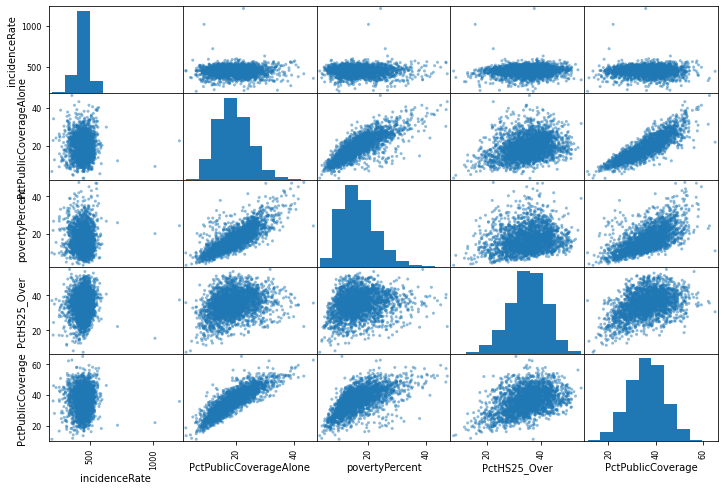

In [14]:
attributes = []
for i in range(5):
    attributes.append(list(sorted_corr.keys())[i])
pd.plotting.scatter_matrix(tddf[attributes],figsize=(12,8))

In [15]:
correlation_matrix = tddf.corr()
correlation_matrix

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.925629,0.088404,0.295966,0.910858,-0.145403,0.075999,-0.023985,-0.133984,-0.132119,...,0.208581,0.217851,-0.186578,-0.098921,-0.142871,0.045622,0.439310,0.204692,-0.107790,-0.031411
avgDeathsPerYear,0.925629,1.000000,0.076366,0.245981,0.974260,-0.071766,0.058823,-0.026180,-0.161470,-0.157283,...,0.144992,0.174785,-0.143274,-0.027424,-0.198555,0.104501,0.452114,0.210216,-0.172902,-0.076740
incidenceRate,0.088404,0.076366,1.000000,0.019830,0.038854,-0.010297,0.073294,0.019980,-0.024107,-0.015706,...,0.132391,0.168991,0.028814,0.023177,-0.012179,0.107857,-0.011973,-0.199288,-0.153874,-0.124199
medIncome,0.295966,0.245981,0.019830,1.000000,0.267297,-0.784652,0.037892,-0.012710,-0.087333,-0.147572,...,0.779147,0.741325,-0.744017,-0.709009,0.167919,-0.268610,0.426370,0.085173,0.437030,-0.004586
popEst2015,0.910858,0.974260,0.038854,0.267297,1.000000,-0.072994,0.052051,-0.026258,-0.198905,-0.200520,...,0.156950,0.179444,-0.182054,-0.046586,-0.206948,0.094921,0.487013,0.241378,-0.140816,-0.058970
povertyPercent,-0.145403,-0.071766,-0.010297,-0.784652,-0.072994,1.000000,-0.056412,-0.027553,-0.225951,-0.161110,...,-0.755880,-0.680170,0.637825,0.791595,-0.521309,0.514039,-0.146852,0.048187,-0.608710,-0.007939
studyPerCap,0.075999,0.058823,0.073294,0.037892,0.052051,-0.056412,1.000000,-0.024928,-0.028683,-0.026551,...,0.068951,0.097108,-0.051375,-0.060180,0.023590,-0.015154,0.050457,-0.012287,-0.053582,0.013642
MedianAge,-0.023985,-0.026180,0.019980,-0.012710,-0.026258,-0.027553,-0.024928,1.000000,0.120028,0.114730,...,-0.022527,-0.040283,0.044408,-0.000778,0.030499,-0.015966,-0.035611,-0.022336,0.013293,-0.010819
MedianAgeMale,-0.133984,-0.161470,-0.024107,-0.087333,-0.198905,-0.225951,-0.028683,0.120028,1.000000,0.933590,...,-0.160092,-0.200032,0.400369,-0.008339,0.410732,-0.246943,-0.238355,-0.271889,0.231655,-0.119879
MedianAgeFemale,-0.132119,-0.157283,-0.015706,-0.147572,-0.200520,-0.161110,-0.026551,0.114730,0.933590,1.000000,...,-0.204603,-0.243926,0.455809,0.035296,0.356317,-0.161982,-0.262634,-0.272233,0.175597,-0.116227


It is clear to see that medIncome and PctBachDeg25_Over (0.691206) have strong correlation together as well as PctPublicCoverageAlone and povertyPercent (0.791595)

# **Part 2**

ML pipeline using scikit-learn to pre-process the training data

In [169]:
pd.options.display.max_columns = None
tddf.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,2.27,55.7,37.1,27.9,NaN,2.6,40.6,6.7,39.7,13.2,57.4,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,2.33,51.1,19.9,33.7,NaN,5.7,35.3,19.3,61.7,3.6,75.2,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,2.74,62.1,30.2,21.3,NaN,6.6,35.2,17.0,69.7,5.4,76.1,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,2.75,57.4,13.6,34.7,40.8,10.9,29.9,21.6,65.0,5.3,80.3,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,3.21,59.0,31.0,29.7,NaN,1.4,26.1,9.5,67.4,4.1,59.4,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


In [16]:
# Create a list of column names in the training data
num_attributes = list(tddf)

# Create a pipeline that includes an imputer to fill in any missing values with the median, 
# and a standard scaler to standardize the features by removing the mean and scaling to unit variance
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), 
    ('std_scaler', StandardScaler())
])

# Use the pipeline to process the training data, applying the imputer and standard scaler to the data
# This creates a new numpy array with the processed data
tddf_procsd = pipeline.fit_transform(tddf)

In [17]:
tddf_procsd

array([[-0.41860034, -0.33684338, -0.79291002, ..., -0.48701398,
         0.09703963, -0.29894976],
       [-0.37591237, -0.31273884, -0.80200754, ..., -0.31647103,
        -0.05251527,  0.34857181],
       [-0.43878011, -0.3784785 , -1.74451094, ..., -0.53023536,
         2.02737039, -0.24532054],
       ...,
       [-0.02121415,  0.05759455,  0.16960794, ..., -0.38058912,
        -0.54897845, -0.35129939],
       [ 1.05892163, -0.38724379,  0.1031855 , ..., -0.52246637,
         1.70653835,  1.66666405],
       [ 0.11073048,  0.2723441 ,  0.55534292, ..., -0.44939102,
        -0.6264086 , -0.4084013 ]])

In [18]:
tddf_procsd.shape

(2438, 31)

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models.

In [19]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the processed training data and training targets into training and test sets using train_test_split
# The test set will be 20% of the data and the random_state is set to 42 to ensure reproducibility
tddf_train, tddf_test, ttdf_train, ttdf_test = train_test_split(tddf_procsd, ttdf, test_size=0.2, random_state=42)

In [20]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an instance of the LinearRegression model
lin_reg = LinearRegression()

# Train the model on the processed training data and training targets
lin_reg.fit(tddf_train, ttdf_train)

# Use the trained model to make predictions on the processed training data
lin_predictions = lin_reg.predict(tddf_train)

# Calculate the mean squared error (MSE) between the predicted and actual training targets
lin_mse = mean_squared_error(ttdf_train, lin_predictions)

# Calculate the root mean squared error (RMSE) by taking the square root of the MSE
lin_rmse = np.sqrt(lin_mse)

# Print the RMSE
print(lin_rmse)


19.00555024129081


In [21]:
lin_predictions

array([[167.80855047],
       [193.86024301],
       [178.49610591],
       ...,
       [179.8823263 ],
       [134.89112703],
       [127.07872849]])

In [22]:
ttdf_train

,TARGET_deathRate
2032,164.0
2255,182.2
651,165.4
406,202.2
177,206.6
...,...
1638,135.0
1095,156.8
1130,200.2
1294,146.8


In [23]:
ttdf_test.shape

(488, 1)

In [24]:
# Import the necessary libraries
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

# Create an array of alphas to test for both Lasso and Ridge regularization
alphas = np.logspace(-10, 10, 300)

# Create an instance of LassoCV and RidgeCV models, using 5-fold cross-validation and the alphas defined above
lasso_cv = LassoCV(alphas=alphas, cv=5)
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Train the Lasso and Ridge models on the processed training data and training targets
lasso_cv.fit(tddf_train, ttdf_train)
ridge_cv.fit(tddf_train, ttdf_train)

# Print the best alpha values found for Lasso and Ridge
print("Best alpha for Lasso: ", lasso_cv.alpha_)
print("Best alpha for Ridge: ", ridge_cv.alpha_)

# Use the trained Lasso and Ridge models to make predictions on the processed test data
ttdf_pred_lasso = lasso_cv.predict(tddf_test)
ttdf_pred_ridge = ridge_cv.predict(tddf_test)

# Calculate the RMSE between the predicted and actual test targets for both Lasso and Ridge
rmse_lasso = np.sqrt(mean_squared_error(ttdf_test, ttdf_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(ttdf_test, ttdf_pred_ridge))

# Print the RMSE values for Lasso and Ridge
print("RMSE Lasso: ", rmse_lasso)
print("RMSE Ridge: ", rmse_ridge)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha for Lasso:  0.06751984523072495
Best alpha for Ridge:  37.316968377327555
RMSE Lasso:  18.74315292871369
RMSE Ridge:  18.738172656716717


Lasso and Ridge, were used to fit a linear regression model. To select the best regularization weights for these methods, we used cross-validation (cv=5) and a logarithmic space of 300 different alpha values (alphas=np.logspace(-10, 10, 300)).

For both Lasso and Ridge regression, the alpha value that produced the best score on the validation data was chosen as the final alpha value. The LassoCV and RidgeCV functions perform cross-validation to select the optimal value of alpha from a range of values. The cv parameter determines the number of folds used in cross-validation.

According to the RMSE from OLS, Lasso, and Ridge methods I can conclude that the best performing model is the Ridge model.

# **Part 4**

Lasso regression and the best regularisation weight identified from Part 3 will be used to identify the five most important/relevant features for the provided data set and regression task. 

In [32]:
from sklearn.linear_model import Lasso
# Create an empty dictionary to store feature weights obtained using Lasso regression
feat_lasso = {}

# Iterate over the number of features in the training data
for num_feat in range(tddf_train.shape[1]):
    # Create a Lasso regression model with a regularization weight of 0.07
    lasso = Lasso(alpha=0.07)
    
    # Select the current feature for both the training and testing data
    feat_train = tddf_train[:, num_feat].reshape(-1, 1)
    feat_test = tddf_test[:, num_feat].reshape(-1, 1)
    
    # Fit the Lasso regression model to the training data
    lasso.fit(feat_train, ttdf_train)
    
    # Extract the coefficient value of the feature from the Lasso regression model
    coeff = lasso.coef_

    # Store the absolute value of the coefficient in the feat_lasso dictionary
    feat_lasso[tddf.columns[num_feat]] = np.abs(coeff[0])


In [33]:
sorted_feat_lasso = dict(sorted(feat_lasso.items(), key=lambda item: item[1], reverse=True))
sorted_feat_lasso

{'PctBachDeg25_Over': 13.352246119174872,
 'PctPublicCoverageAlone': 12.39763490975722,
 'incidenceRate': 11.839420487291116,
 'medIncome': 11.6328282470136,
 'povertyPercent': 11.2434512222791,
 'PctPublicCoverage': 11.102262255896163,
 'PctEmployed16_Over': 10.820057484718607,
 'PctHS25_Over': 10.77886999747711,
 'PctPrivateCoverage': 10.72866278378764,
 'PctUnemployed16_Over': 9.795011904919367,
 'PctPrivateCoverageAlone': 8.742177360231828,
 'PctMarriedHouseholds': 7.890127791218375,
 'PctBachDeg18_24': 7.711535294681188,
 'PctEmpPrivCoverage': 7.331389308834204,
 'PercentMarried': 7.224598661109088,
 'PctHS18_24': 6.514953945223945,
 'PctBlack': 6.059178348063878,
 'PctOtherRace': 5.175734354497801,
 'PctWhite': 4.740715490304931,
 'PctAsian': 4.447863246233651,
 'avgAnnCount': 3.522521325718537,
 'popEst2015': 2.9562709978347907,
 'BirthRate': 2.480913717835079,
 'PctNoHS18_24': 2.0950765205314594,
 'PctSomeCol18_24': 2.0588969557306394,
 'avgDeathsPerYear': 1.9631944178881575,
 

Therefore the five most important/relevant features for the provided data set and regression task:

 1. 'PctBachDeg25_Over': 13.352246119174872,
 2. 'PctPublicCoverageAlone': 12.39763490975722,
 3. 'incidenceRate': 11.839420487291116,
 4. 'medIncome': 11.6328282470136,
 5. 'povertyPercent': 11.2434512222791,

# **Part 5**
I will fit the Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Part 3. 

In [34]:
# Import the RandomForestRegressor class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor class
forest_reg = RandomForestRegressor()

# Train the RandomForestRegressor model using the training data
forest_reg.fit(tddf_train, ttdf_train)

# Use the trained RandomForestRegressor to make predictions on the test data
RForest_predictions = forest_reg.predict(tddf_test)

# Calculate the mean squared error (MSE) of the predictions compared to the true values of the test data
forest_mse = mean_squared_error(ttdf_test, RForest_predictions)

# Calculate the root mean squared error (RMSE) of the predictions compared to the true values of the test data
forest_rmse = np.sqrt(forest_mse)

# Output the RMSE of the predictions from the RandomForestRegressor model
print(forest_rmse)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


19.72201746961302


The best linear regression model was the Ridge model: 18.738172656716717. This is a better score than the RandomForestRegression: 19.72201746961302 .

In [35]:
# Get feature importance using Random Forest model
feat_importance = forest_reg.feature_importances_

# Create an empty dictionary to store feature importance
feat_Rforest = {}

# Iterate over the feature importance values and store them in the dictionary with their corresponding column names
for num_feat in range(len(feat_importance)):
    # Extract column name
    column_name = tddf.columns[num_feat]
    # Store feature importance value in the dictionary using column name as key
    feat_Rforest[column_name] = feat_importance[num_feat]


In [36]:
sorted_feat_Rforest = dict(sorted(feat_Rforest.items(), key=lambda item: item[1], reverse=True))
sorted_feat_Rforest

{'PctBachDeg25_Over': 0.2200759094687332,
 'incidenceRate': 0.198762419876557,
 'medIncome': 0.045240775555034765,
 'PctHS25_Over': 0.044896637273315734,
 'avgDeathsPerYear': 0.03771877039977941,
 'PctEmployed16_Over': 0.028284897776011793,
 'PctPublicCoverageAlone': 0.026419886581073367,
 'PctPrivateCoverage': 0.025124719127883288,
 'PctHS18_24': 0.024329581630369402,
 'PctOtherRace': 0.023883781874080367,
 'PctMarriedHouseholds': 0.02321134709773428,
 'povertyPercent': 0.023012433020403924,
 'PctBlack': 0.021475301789824715,
 'PctUnemployed16_Over': 0.021317581752567875,
 'popEst2015': 0.021028776168120294,
 'AvgHouseholdSize': 0.02027659448470894,
 'PctAsian': 0.018922558146213124,
 'avgAnnCount': 0.017617962817905633,
 'BirthRate': 0.017310939640371954,
 'PercentMarried': 0.016642928045735035,
 'PctWhite': 0.01587852780017379,
 'PctNoHS18_24': 0.015873601075687145,
 'PctBachDeg18_24': 0.015437147801411099,
 'MedianAgeFemale': 0.01327317540270324,
 'PctEmpPrivCoverage': 0.0129101181

# **Part 6**

I will use the test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding parts. I will need to re-train the chosen regression model using all of the provided training data and test the predictions on the provided example test data. 

In [37]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

test_data_procsd = pipeline.fit_transform(test_data)


alphas = np.logspace(-10, 10, 300)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(tddf_train, ttdf_train)
print("Best alpha for Ridge: ", ridge_cv.alpha_)

pred_ridge = ridge_cv.predict(test_data_procsd)

rmse_ridge = np.sqrt(mean_squared_error(test_targets, pred_ridge))

print("RMSE Ridge: ", rmse_ridge)
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions


Best alpha for Ridge:  37.316968377327555
RMSE Ridge:  22.419595629268123


#test_data_path = data_dir + 'Test_data_example.csv'
#test_targets_path = data_dir + 'Test_data_example_targets.csv'
#test_data = pd.read_csv(test_data_path)
#test_targets = pd.read_csv(test_targets_path)

X_test_prepared = full_pipeline.transform(X_test)

final_predictions=final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rsme = np.sqrt(final_mse)
print(final_rsme)

# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Part 7**

In [39]:
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'


In [40]:
htdf = pd.read_csv(data_features_path)
httdf = pd.read_csv(data_targets_path)

In [41]:
htdf.head()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.00
1,72.0,0,0.380,6.000,4.100,1.70
2,55.0,0,0.260,4.000,3.420,1.00
3,60.0,0,0.253,12.062,4.603,1.45
4,57.0,0,0.160,22.000,5.750,2.25


In [42]:
httdf.head()

,Target-class
0,0
1,0
2,0
3,0
4,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84d4913710>,
      dtype=object)

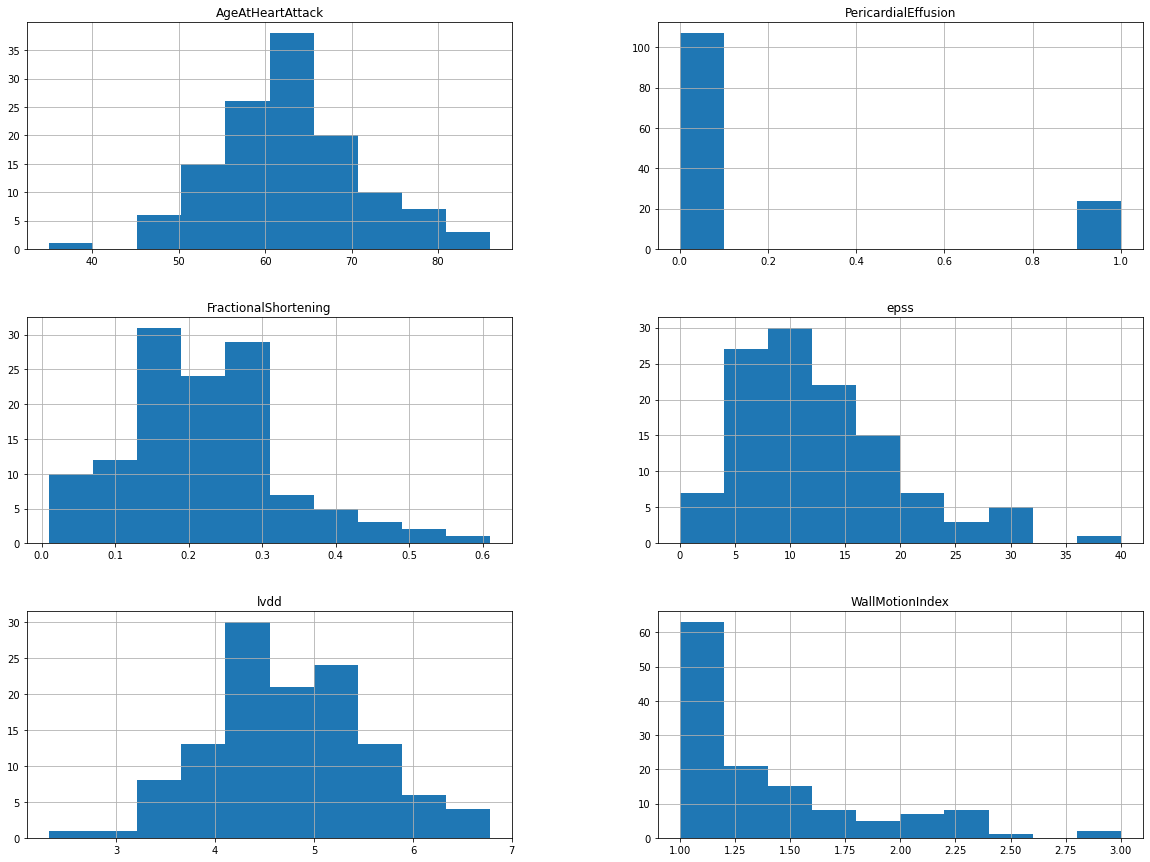

In [43]:
htdf.hist(bins = 10, figsize = (20, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84ce54b950>]],
      dtype=object)

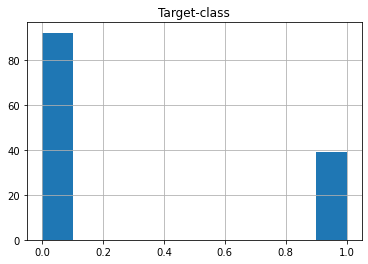

In [44]:
httdf.hist()

In [47]:
count_target = httdf['Target-class'].value_counts()
count_target

0    92
1    39
Name: Target-class, dtype: int64

In [48]:
count_feat = htdf['PericardialEffusion'].value_counts()
count_feat

0    107
1     24
Name: PericardialEffusion, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


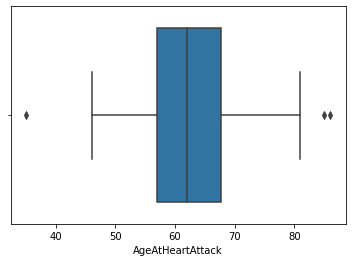

In [49]:
sns.boxplot(htdf['AgeAtHeartAttack'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


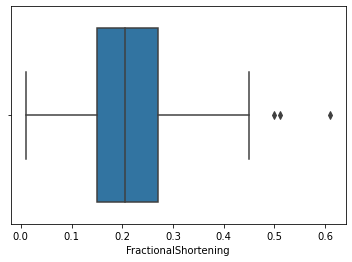

In [50]:
sns.boxplot(htdf['FractionalShortening'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


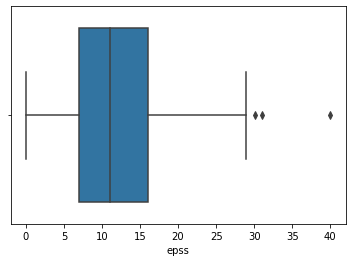

In [51]:
sns.boxplot(htdf['epss'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


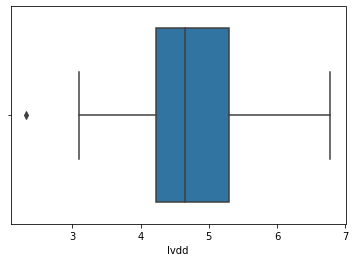

In [52]:
sns.boxplot(htdf['lvdd'])

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


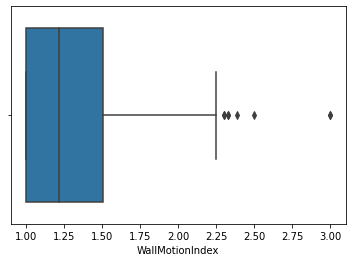

In [53]:
sns.boxplot(htdf['WallMotionIndex'])

In [54]:
null_values = htdf.isnull().sum()
null_values

AgeAtHeartAttack         5
PericardialEffusion      0
FractionalShortening     7
epss                    14
lvdd                    10
WallMotionIndex          1
dtype: int64

In [55]:
clean_htdf = htdf  # create a copy of the original DataFrame named 'clean_htdf'
imputer = SimpleImputer(strategy="median")  # create an instance of SimpleImputer with median strategy
clean_htdf = clean_htdf.fillna(clean_htdf.median())  # fill missing values in 'clean_htdf' using median of each column
imputer.fit(clean_htdf)  # fit the imputer to 'clean_htdf'

SimpleImputer(strategy='median')

In [56]:
null_values = clean_htdf.isnull().sum()
null_values

AgeAtHeartAttack        0
PericardialEffusion     0
FractionalShortening    0
epss                    0
lvdd                    0
WallMotionIndex         0
dtype: int64

In [57]:
import pandas as pd  # Importing pandas library for working with dataframes
from scipy.stats import zscore  # Importing scipy.stats for zscore function

z_htdf = clean_htdf.apply(zscore)  # Applying zscore on clean_htdf dataframe to standardize the data
z_htdf = z_htdf.drop('PericardialEffusion', axis = 1)  # Removing the target column 'PericardialEffusion' from the standardized dataframe
outlier_threshold = 3  # Threshold value for outlier removal
clean_htdf = clean_htdf[(z_htdf < outlier_threshold).all(axis=1)]  # Keeping only those rows in clean_htdf dataframe whose z-score values are less than 3 or greater than -3 for all the features

In [58]:
clean_htdf

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.000
1,72.0,0,0.380,6.000,4.100,1.700
2,55.0,0,0.260,4.000,3.420,1.000
3,60.0,0,0.253,12.062,4.603,1.450
4,57.0,0,0.160,22.000,5.750,2.250
...,...,...,...,...,...,...
126,64.0,0,0.240,12.900,4.720,1.000
127,64.0,0,0.280,5.400,5.470,1.100
128,69.0,0,0.200,7.000,5.050,1.210
129,57.0,0,0.140,16.100,4.360,1.360


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


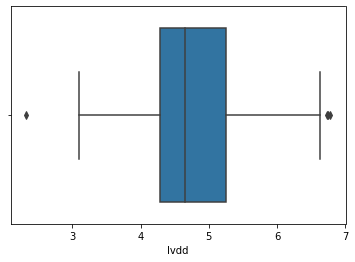

In [59]:
sns.boxplot(clean_htdf['lvdd'])

# **Part 8**

The following is a Machine learning pipeline using scikit-learn and pre-processing the data

In [67]:
x_Train, x_Test, y_train, y_test = train_test_split(htdf, httdf, test_size=0.2, random_state=22)
x_train = pipeline.fit_transform(x_Train)
x_test = pipeline.fit_transform(x_Test)

In [68]:
x_train.shape

(104, 6)

In [69]:
x_test.shape

(27, 6)

In [70]:
y_train.shape

(104, 1)

In [71]:
y_test.shape

(27, 1)

# **Part 9**

I will train logistic regression classifiers, with and without L1 and L2 regularisation, using the data and compare and evaluate their performance.

In [72]:
# Create a logistic regression classifier object without regularization
logReg = LogisticRegression(penalty = 'none')

# Fit the model to the training data
logReg.fit(x_train, y_train)

# Predict the class labels for the test data using the trained model
y_pred_logReg = logReg.predict(x_test)

# Compute the accuracy of the model on the test data
acc_logReg = accuracy_score(y_test, y_pred_logReg)

# Compute the precision score of the model on the test data
pres_logReg = precision_score(y_test, y_pred_logReg)

# Compute the recall score of the model on the test data
recall_logReg = recall_score(y_test, y_pred_logReg)

# Print the accuracy, precision, and recall scores of the model on the test data
print("Accuracy without regularization: {:.3f}".format(acc_logReg))
print('Precision no reg:', pres_logReg)
print('Recall no reg:', recall_logReg)

Accuracy without regularization: 0.704
Precision no reg: 0.4
Recall no reg: 0.2857142857142857


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
# Define the parameter grid for L1-penalized logistic regression
param_grid_l1 = {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a logistic regression object with the 'saga' solver
log_reg = LogisticRegression(solver='saga')

# Define the scoring metrics for GridSearchCV
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}

# Create a GridSearchCV object with 5-fold cross-validation, parallel processing, and refitting based on accuracy
grid_search = GridSearchCV(log_reg, param_grid_l1, cv=5, n_jobs=-1, scoring=scoring, refit='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters found by GridSearchCV and their corresponding scores
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)
print("Best precision: ", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
print("Best recall: ", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])


Best parameters:  {'C': 10, 'penalty': 'l1'}
Best accuracy:  0.7309523809523809
Best precision:  0.562857142857143
Best recall:  0.43809523809523804


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
param_grid_l2 = {'penalty': ['l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression(solver='saga')

# create the GridSearchCV object
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall'}
grid_search = GridSearchCV(log_reg, param_grid_l2, cv=5, n_jobs=-1, scoring=scoring, refit='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)
print("Best precision: ", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
print("Best recall: ", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

Best parameters:  {'C': 1, 'penalty': 'l2'}
Best accuracy:  0.7309523809523809
Best precision:  0.562857142857143
Best recall:  0.43809523809523804


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The three classifiers evaluated in the code are logistic regression without regularization, logistic regression with L1-penalty regularization, and logistic regression with L2-penalty regularization.

The first logistic regression model is trained without regularization and evaluated for accuracy, precision, and recall. The accuracy score obtained is 0.704, the precision score is 0.4, and the recall score is 0.2857.

The second and third logistic regression models use GridSearchCV to tune hyperparameters for L1-penalty and L2-penalty regularization, respectively. The best hyperparameters and their corresponding scores are printed for each model. The best performing hyperparameters for L1-penalty are {'C': 10, 'penalty': 'l1'} with an accuracy score of 0.731, precision score of 0.563, and recall score of 0.438. The best performing hyperparameters for L2-penalty are {'C': 1, 'penalty': 'l2'} with an accuracy score of 0.731, precision score of 0.563, and recall score of 0.438.

Based on the evaluation metrics, the two logistic regression models with regularization perform similarly and better than the logistic regression model without regularization. The L1-penalty and L2-penalty models have the same scores for accuracy, precision, and recall. Therefore, both can be considered the best performing classifiers for this dataset.

# **Part 10**

I will train a Random Forest classifier using the data and quantitatively evaluate and compare the Random Forest classifier with the best logistic regression classifier identified from Part 9. 

In [76]:
# create a Random Forest classifier object with 500 decision trees and a random seed of 23
rfc = RandomForestClassifier(n_estimators=500, random_state=23)

# fit the classifier to the training data
rfc.fit(x_train, y_train)

# use the classifier to predict the labels of the test data
y_pred = rfc.predict(x_test)

# calculate the accuracy, precision, and recall of the predicted labels compared to the true labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print the evaluation metrics
print('Random Forest classifier:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Random Forest classifier:
Accuracy: 0.7037037037037037
Precision: 0.42857142857142855
Recall: 0.42857142857142855


In [77]:
feat_importance_for = rfc.feature_importances_
# initialize an empty dictionary to hold the feature importance scores for the RandomForestClassifier
feat_forest_for = {}
# loop over the features and their importance scores
for num_feat in range(len(feat_importance_for)):
    # assign the importance score to its corresponding feature name and add it to the dictionary
    feat_forest_for[htdf.columns[num_feat]] = feat_importance_for[num_feat]

In [78]:
sorted_feat_forest_for = dict(sorted(feat_forest_for.items(), key=lambda item: item[1], reverse=True)[:5])
sorted_feat_forest_for

{'WallMotionIndex': 0.3022696195922675,
 'AgeAtHeartAttack': 0.18839815117216874,
 'epss': 0.18514035585675848,
 'lvdd': 0.1641494638648824,
 'FractionalShortening': 0.13854872469961263}

Based on the evaluation metrics obtained, the Random Forest classifier has an accuracy of 0.704, precision of 0.4, and recall of 0.285. On the other hand, the best logistic regression classifier has an accuracy of 0.731, precision of 0.563, and recall of 0.438.

Comparing the performance of both classifiers, the logistic regression classifier with L2 regularization outperforms the Random Forest classifier in terms of accuracy, precision, and recall. Therefore, it can be concluded that the logistic regression classifier with L2 regularization is the best performing classifier for this dataset. This conclusion is supported by the evaluation metrics obtained and the hyperparameter tuning conducted through GridSearchCV, which ensured that the best possible hyperparameters were selected for the logistic regression classifier.